# screener

In [2]:
import os
os.chdir('/Users/siegstedt/projects/trading/binance')
!pwd

/Users/siegstedt/projects/trading/binance


#### request all tickers

In [58]:
import requests
import json
import pandas as pd
import numpy as np
import datetime as dt

In [31]:
# load raw data from api
url = "https://api.binance.com/api/v3/ticker/price"
df = pd.DataFrame(json.loads(requests.get(url).text))

# get BTC and EUR markets
df['market'] = [
    i[-3:] if i[-3:] in ['BTC','EUR'] else np.nan
    for i 
    in df['symbol']
]

# filter out other markets
df = df.dropna().reset_index(drop=True)

In [33]:
# inspect dataframe
df

,symbol,price,market
0,ETHBTC,0.03518300,BTC
1,LTCBTC,0.00389600,BTC
2,BNBBTC,0.00668420,BTC
3,NEOBTC,0.00106500,BTC
4,BCCBTC,0.07908100,BTC
...,...,...,...
332,LUNAEUR,12.78900000,EUR
333,THETAEUR,10.22600000,EUR
334,EPSBTC,0.00006389,BTC
335,AUTOBTC,0.06058000,BTC


In [36]:
# extract list of symbols
symbols = df.symbol.to_list()
# inspect
symbols[:5]

['ETHBTC', 'LTCBTC', 'BNBBTC', 'NEOBTC', 'BCCBTC']

#### request short-term data for symbol

In [59]:
def get_binance_bars(symbol, interval, start_time, end_time, limit="1000"):
    """Get historical bars for a ticker from Binance
    
    Args:
        symbol (str): Binance symbol
        interval (str): Interval for historical data, e.g. '1h' for hourly bars
        start_time (datetime object): Start time of history
        end_time (datetime object): End time of history
        limit (str): Limit of number of lines for data request, defaulted to 1000
    
    Returns:
        df: pandas DataFrame object
        
    Exampls:
        >>> get_binance_bars('ETHEUR', '1h', dt.datetime(2020, 1, 1), dt.datetime(2020, 2, 1))
        
    """
    
    # define the binance url from data is requested
    url = "https://api.binance.com/api/v3/klines"
    
    # setting request params
    req_params = {'symbol': symbol,
                  'interval': interval,
                  'startTime': str(int(start_time.timestamp() * 1000)),
                  'endTime' : str(int(end_time.timestamp() * 1000)),
                  'limit' : str(limit)}
 
    # load request into a dataframe
    df = pd.DataFrame(json.loads(requests.get(url, params = req_params).text))
    if (len(df.index) == 0):
        return None     
    
    # transfrom dataframe
    df = df.iloc[:, 0:6]  # extract 
    df.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume'] 
    df.open = df.open.astype("float")
    df.high = df.high.astype("float")
    df.low = df.low.astype("float")
    df.close = df.close.astype("float")
    df.volume = df.volume.astype("float")
    df.index = [dt.datetime.fromtimestamp(x / 1000.0) for x in df.datetime]
 
    return df

In [60]:
# get data for last hour in 5 minute intervals
symbol = symbols[0]
end_time = dt.datetime.now()
start_time = dt.datetime.now() - dt.timedelta(seconds=60*60)

# request data
df = get_binance_bars(symbol, '5m', start_time, end_time)

In [63]:
df

,datetime,open,high,low,close,volume
2021-04-07 20:00:00,1617818400000,0.035088,0.035195,0.035044,0.035192,1111.029
2021-04-07 20:05:00,1617818700000,0.035195,0.035253,0.035193,0.035241,654.337
2021-04-07 20:10:00,1617819000000,0.035240,0.035305,0.035230,0.035269,718.911
2021-04-07 20:15:00,1617819300000,0.035270,0.035327,0.035251,0.035262,690.344
2021-04-07 20:20:00,1617819600000,0.035263,0.035263,0.035172,0.035178,684.590
2021-04-07 20:25:00,1617819900000,0.035181,0.035220,0.035131,0.035143,677.575
2021-04-07 20:30:00,1617820200000,0.035151,0.035175,0.035110,0.035138,672.278
2021-04-07 20:35:00,1617820500000,0.035140,0.035212,0.035126,0.035154,646.707
2021-04-07 20:40:00,1617820800000,0.035154,0.035259,0.035130,0.035236,755.288
2021-04-07 20:45:00,1617821100000,0.035235,0.035238,0.035148,0.035190,682.983


<AxesSubplot:>

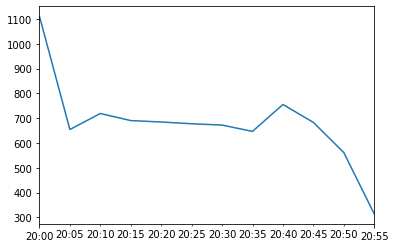

In [64]:
df['volume'].plot()

<AxesSubplot:>

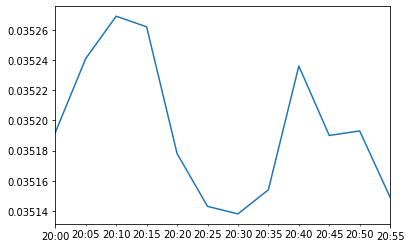

In [65]:
df['close'].plot()

In [ ]:
# check growth in volume
# check growth in closing price
# check for market cap
# create a short list
# sort list
# attach a prio ranking
# export data